Nama : Afifah Nibras

NPM : 2108107010097

Link Dataset : https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university

Dataset tersebut memiliki 9 kolom yaitu 
Serial No.,	GRE Score,	TOEFL Score,	University Rating,	SOP,	LOR, CGPA,	Research, dan	Chance of Admit. Saya melakukan studi kasus melihat hubungan antara CGPA dengan chance of admit. Dengan menjadikan CGPA sebagai fitur dan Chance of Admit sebagai target. Kemudian saya membuat model regresi ann dan menampilkan visualisasi model tersebut. Saya juga menampilkan nilai dari MSE, RMSE, MAE, dan R-Squared.

In [1]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Mengambil dataset
dataset = pd.read_csv('adm_data.csv')
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


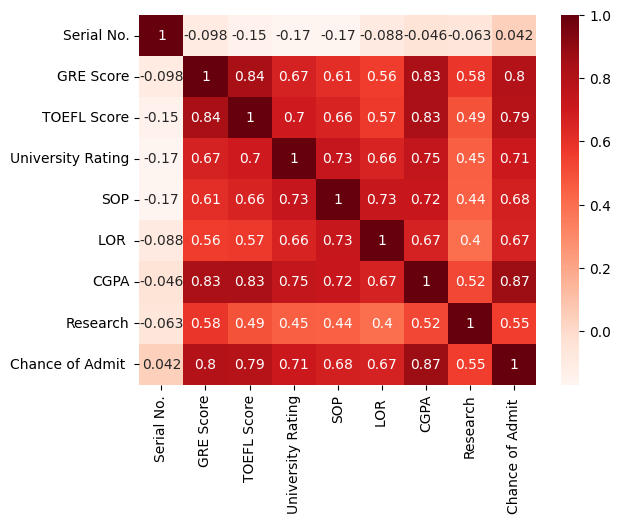

In [3]:
# Menampilkan korelasi
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(dataset.corr(), annot=True, cmap='Reds')
plt.show()

In [4]:
# Memisahkan fitur dan target
X = dataset['CGPA'].values.reshape(-1, 1)
y = dataset['Chance of Admit '].values

# Pembagian data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Penskalaan fitur
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [6]:
# Membangun model
model_ann = Sequential()
model_ann.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dense(1))

# Melatih model
model_ann.compile(optimizer='adam', loss='mean_squared_error')
model_ann.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
10/10 [==============================] - 1s 4ms/step - loss: 0.4067
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1014
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0509
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0244
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 11/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 13/100
10/10 [=================

4/4 [==============================] - 0s 0s/step
Mean Absolute Error: 0.0705836921930313
Mean Squared Error: 0.008107491916714225
Root Mean Squared Error: 0.0900416121396892


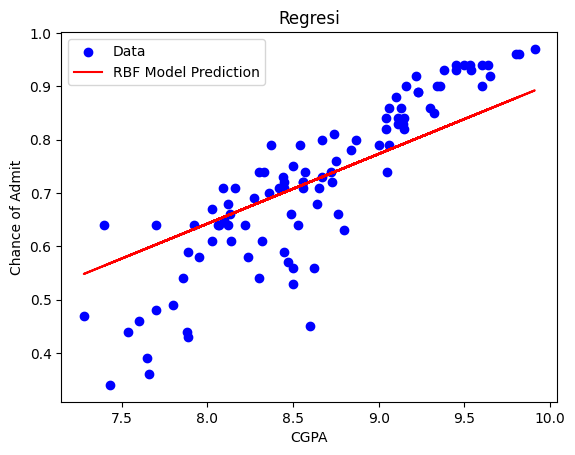

In [7]:

y_pred = model_ann.predict(X_test)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Membuat scatter plot untuk Luas Panen dan Produksi
plt.scatter(X_test, y_test, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', label='RBF Model Prediction')
plt.title('Regresi')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.legend()
plt.show()
